In [7]:
import os

segmentation_files = []
segmentation_dir = 'segmentations'

for root, dirs, files in os.walk(segmentation_dir):
    for file in files:
        segmentation_files.append(os.path.join(root, file))

print(len(segmentation_files))

1903


Bins: [1187550.  1867822.2 2548094.4 3228366.6 3908638.8 4588911.  5269183.2
 5949455.4 6629727.6 7309999.8 7990272. ]
Histogram counts: [   4    0    0    0    0 1854    0    0    0   45]


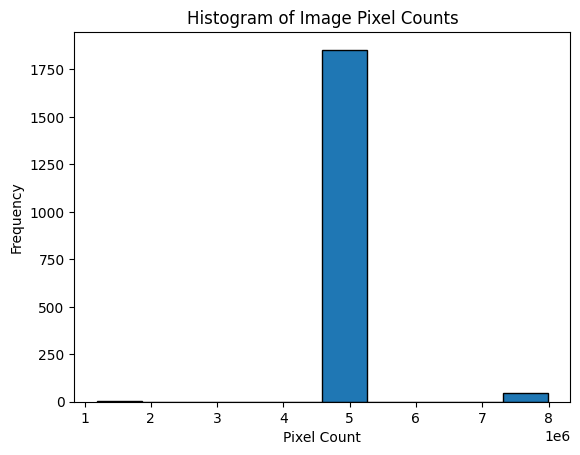

In [4]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

# Read each PNG image from the segmentation_files list and calculate the total number of pixels
pixel_counts = []
for img_path in segmentation_files:
    try:
        with Image.open(img_path) as img:
            width, height = img.size
            pixel_counts.append(width * height)
    except Exception as e:
        print(f"Error processing {img_path}: {e}")

# Convert the list of pixel counts to a NumPy array
pixel_counts_array = np.array(pixel_counts)

# Compute the histogram with 10 bins
hist, bins = np.histogram(pixel_counts_array, bins=10)
print("Bins:", bins)
print("Histogram counts:", hist)

# Optionally, plot the histogram
plt.hist(pixel_counts_array, bins=10, edgecolor='black')
plt.xlabel("Pixel Count")
plt.ylabel("Frequency")
plt.title("Histogram of Image Pixel Counts")
plt.show()

In [11]:
from pprint import pprint
unique_sizes, counts = np.unique(pixel_counts_array, return_counts=True)
pixel_count_dict = {int(size): int(count) for size, count in zip(unique_sizes, counts)}
pprint(pixel_count_dict)

{1187550: 4, 5018112: 1854, 7990272: 45}
